In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [6]:
#Viewing the dataset
dataset.describe

<bound method NDFrame.describe of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [9]:
# Taking the independent and dependent variables from the dataset
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [11]:
# Seeing the data
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [25]:
# Using the algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

# n_estimators is the number of trees - 10, 100, 300 trees etc
# criterion - mse difference between the y_pred and y train.

In [26]:
# fitting the regressor to the dataset
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
y_pred = regressor.predict([[6.5]])
y_pred

array([160333.33333333])

In [28]:
# drawing the plot in a higher resolution as it is a non-linear non-continuous regression model
X_grid = np.arange(min(X), max(X), 0.01)
#X_grid - X_grid.reshape((len(X_grid), 1))

# converting the 1D array into a two dimensional array
X_grid = X_grid.reshape(-1,1)

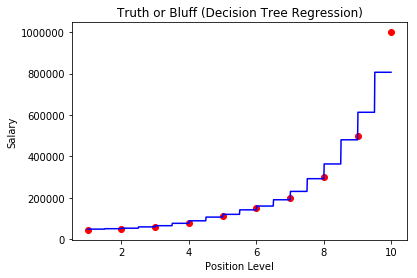

In [29]:
plt.scatter(X,y,color = 'red')
plt.plot(X_grid,regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [30]:
# Better performance with 300 trees - is it an overfit